In [1]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='/opt/acdc_test/opt/output/acdc/norm/1/3'
print (path)

/opt/acdc_test/opt/output/acdc/norm/1/3


In [46]:
list_bad_label=[]
total_labels_count=0
list_not_max3=[]
list_all_images=[]
for root,subdirs,files in os.walk(path):
    #print(root)
    for file in os.listdir(root):
        filePath = os.path.join(root, file) 
        #print (filePath)
        #break        
        if filePath.endswith('label.nii.npy'):
            total_labels_count+=1
            image=np.load(filePath)
            if np.sum(image)==0:
                list_bad_label.append(filePath)
            elif np.max(image)!=3 and np.max(image)>0:
                list_not_max3.append(filePath)
        else:
            list_all_images.append(file)

In [49]:
print('Number of labels which are all O values: '+str(len(list_bad_label)))
print(len(list_not_max3))
print(total_labels_count)
print(len(list_all_images))

61
33
1902
25451


In [6]:
test_not_max3=list_not_max3[4]

/opt/acdc_test/opt/output/acdc/norm/1/3/patient057/patient057_slice8_frame09_label.nii.npy
2.0


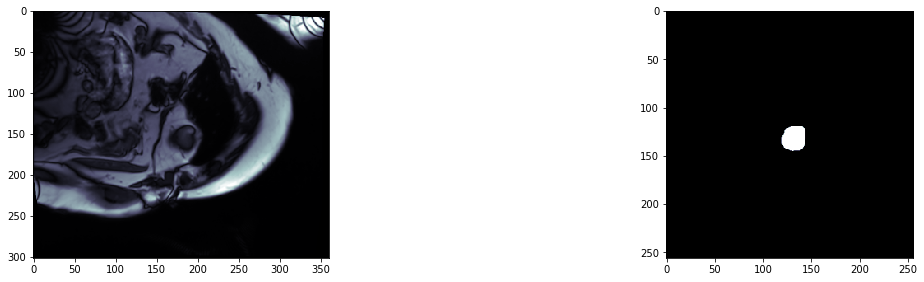

In [11]:
im=np.load(test_not_max3)
print(test_not_max3)
print(np.max(im))
#plt.imshow(im,cmap='bone') # so we can't hard code to 3
orig_im=np.load('/opt/acdc_test/opt/output/acdc/norm/1/3/patient057/patient057_slice8_frame9.nii.npy')

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(orig_im, cmap="bone")
plt.subplot(222)
plt.imshow(im, cmap="bone")

/opt/acdc_test/opt/output/acdc/norm/1/3/patient034/patient034_slice10_frame16_label.nii.npy
2.0


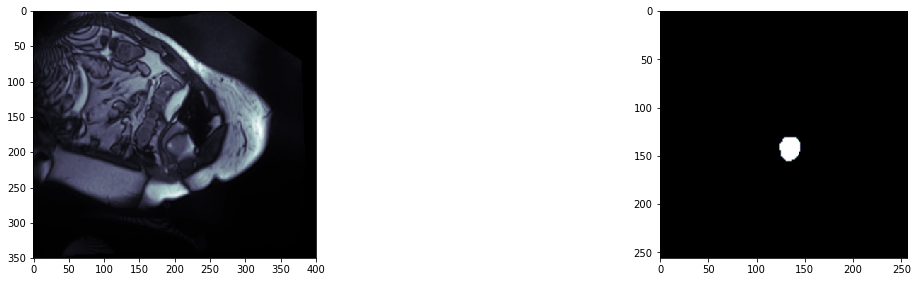

In [13]:
test_not_max3=list_not_max3[9]
print(test_not_max3)
im=np.load(test_not_max3)
print(np.max(im))
orig_im=np.load('/opt/acdc_test/opt/output/acdc/norm/1/3/patient034/patient034_slice10_frame16.nii.npy')

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(orig_im, cmap="bone")
plt.subplot(222)
plt.imshow(im, cmap="bone")

0.0


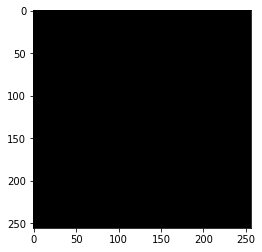

In [71]:
test_bad_label=list_bad_label[9]
im=np.load(test_bad_label)
print(np.max(im))
plt.imshow(im,cmap='bone')

3


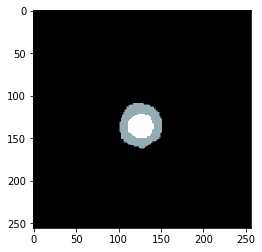

In [72]:
path_good='/opt/acdc_test/opt/output/acdc/norm/1/3/patient001/patient001_slice10_frame12_label.nii.npy'
im_good=np.load(path_good)
print(np.max(im_good))
plt.imshow(im_good,cmap='bone')

In [73]:
def fix_acdc(im):    
    max_val=im.max()
    if max_val!=0: 
        im[im<max_val]=0
        im[im==max_val]=1
    return im

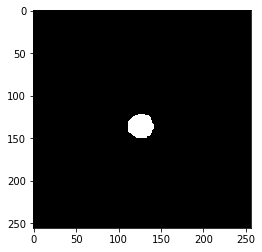

In [77]:
image2=fix_acdc(im_good)
plt.imshow(image2,cmap='bone')

In [20]:
#Comparing labels and corresponding images
list_labels=[]
for root,subdirs,files in os.walk(path):
    for file in os.listdir(root):
        filePath = os.path.join(root, file) 
        if filePath.endswith('label.nii.npy'):
            list_labels.append(file)

    

In [37]:
print (len(list_labels))

1902


In [25]:
label_name='patient003_slice2_frame01_label.nii.npy'
image_name=label_name.replace('rame0','rame')
print(image_name)
image_name1=image_name.replace('_label','')
print(image_name1)

patient003_slice2_frame1_label.nii.npy
patient003_slice2_frame1.nii.npy


In [50]:
dict_label={}
for f in list_labels:
    temp1=f.replace('rame0','rame')
    temp2=temp1.replace('_label','')
    if temp2 in list_all_images:
        dict_label[f]=1
    else:
        dict_label[f]=0
    

In [51]:
print (len(dict_label))

1902


In [53]:
count=0
for i  in dict_label:
    if dict_label[i]==1:
        count+=1
print('Total images for labels'+str(count))        

Total images for labels1902
